In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

In [3]:
data = os.listdir("digits/Digits")
train_X = []
test_X = []
train_y = []
test_y = []
valid_X = []
valid_y = []
data_classes = len(data)

for i in range(data_classes):
    data_X = []
    data_y = []
    data_list = os.listdir("digits/Digits" + "/" + str(i))
    for j in data_list:
        pic = cv2.imread("digits/Digits" + "/" + str(i) + "/" + j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i)
    
    train_X_i, test_X_i, train_y_i, test_y_i = train_test_split(data_X, data_y, test_size=0.05, random_state=42)
    train_X_i, valid_X_i, train_y_i, valid_y_i = train_test_split(train_X_i, train_y_i, test_size=0.2, random_state=42)
    
    train_X.extend(train_X_i)
    test_X.extend(test_X_i)
    train_y.extend(train_y_i)
    test_y.extend(test_y_i)
    valid_X.extend(valid_X_i)
    valid_y.extend(valid_y_i)

# Convert lists to numpy arrays
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_X = np.array(valid_X)
valid_y = np.array(valid_y)

In [242]:
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7686, 32, 32, 3)
Validation Set Shape =  (1922, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [243]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)
#Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [244]:
train_y = tf.keras.utils.to_categorical(train_y, data_classes)
test_y = tf.keras.utils.to_categorical(test_y, data_classes)
valid_y = tf.keras.utils.to_categorical(valid_y, data_classes)

In [245]:
# Creating a Neural Network
model = tf.keras.models.Sequential()
model.add((tf.keras.layers.Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same',activation='relu')))
model.add((tf.keras.layers.Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add((tf.keras.layers.Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((tf.keras.layers.Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       960,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,490 (4.13 MB)

 Trainable params: 1,081,490 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [247]:
# Compiling the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 32, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

# Testing the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Epoch 1/32
200/200 - 31s - 157ms/step - accuracy: 0.6337 - loss: 1.0651 - val_accuracy: 0.9516 - val_loss: 0.1516
Epoch 2/32


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


200/200 - 7s - 35ms/step - accuracy: 0.8872 - loss: 0.3574 - val_accuracy: 0.9610 - val_loss: 0.1065
Epoch 3/32
200/200 - 29s - 145ms/step - accuracy: 0.9126 - loss: 0.2742 - val_accuracy: 0.9672 - val_loss: 0.1001
Epoch 4/32
200/200 - 16s - 81ms/step - accuracy: 0.9276 - loss: 0.2443 - val_accuracy: 0.9828 - val_loss: 0.0572
Epoch 5/32
200/200 - 51s - 253ms/step - accuracy: 0.9454 - loss: 0.1769 - val_accuracy: 0.9844 - val_loss: 0.0546
Epoch 6/32
200/200 - 14s - 71ms/step - accuracy: 0.9451 - loss: 0.1695 - val_accuracy: 0.9828 - val_loss: 0.0543
Epoch 7/32
200/200 - 46s - 229ms/step - accuracy: 0.9515 - loss: 0.1426 - val_accuracy: 0.9839 - val_loss: 0.0568
Epoch 8/32
200/200 - 12s - 58ms/step - accuracy: 0.9588 - loss: 0.1279 - val_accuracy: 0.9865 - val_loss: 0.0395
Epoch 9/32
200/200 - 57s - 284ms/step - accuracy: 0.9622 - loss: 0.1218 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 10/32
200/200 - 11s - 55ms/step - accuracy: 0.9596 - loss: 0.1246 - val_accuracy: 0.9880 - val_los

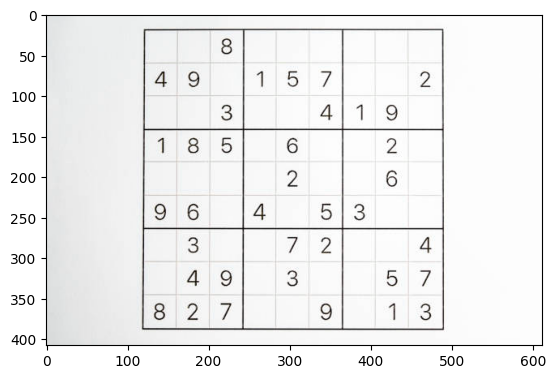

In [248]:
# Randomly select an image from the dataset 
# folder="aug"
# a=random.choice(os.listdir(folder))
# print(a)
sudoku_a = cv2.imread("input_sudoku.jpg")
plt.figure()
plt.imshow(sudoku_a)
plt.show()

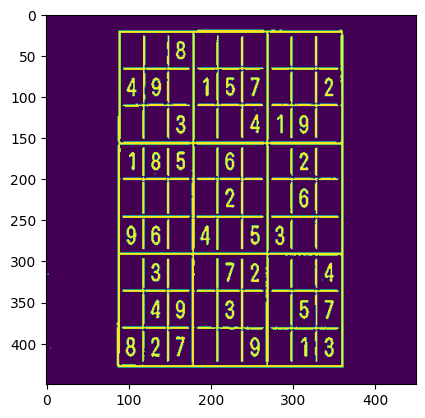

In [249]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))
# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    # blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)
#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

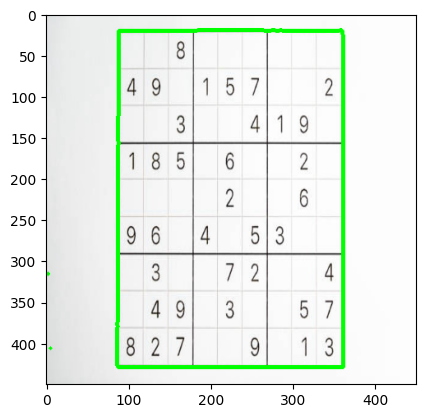

In [250]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

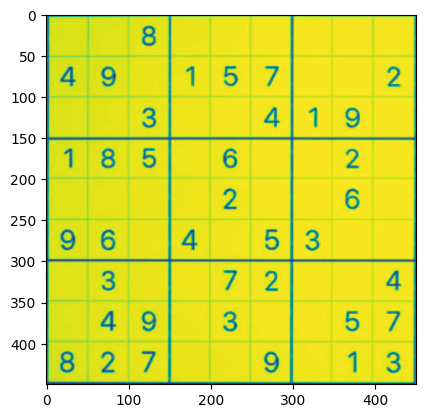

In [251]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area

    return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes

black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
pts1 = np.float32(biggest)
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imagewrap)
plt.show()

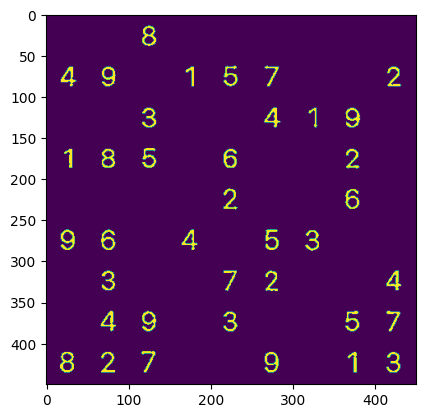

In [252]:
def preprocess_numbers(img):
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)

    return img

def extract_numbers(img):
    result = preprocess_numbers(img)
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(result)
    viz = np.zeros_like(result, np.uint8)

    centroidy = []
    stats_numbers = []

    for i, stat in enumerate(stats):
        if i == 0:
            continue
        if stat[4] > 50 and stat[2] in range(5,40) and stat[3] in range(5,40) and stat[0] > 0 and stat[
            1] > 0 and (int(stat[3] / stat[2])) in range(1,5):
            viz[labels == i] = 255
            centroidy.append(centroids[i])
            stats_numbers.append(stat)

    stats_numbers = np.array(stats_numbers)
    centroidy = np.array(centroidy)
    return viz, stats_numbers, centroidy
img_nums, stats, centroids = extract_numbers(imagewrap)
plt.figure()
plt.imshow(img_nums)
plt.show()

In [253]:
def center_numbers(img, stats, centroids):
    centered_num_grid = np.zeros_like(img, np.uint8)
    matrix_mask = np.zeros((9, 9), dtype='uint8')
    for i, number in enumerate(stats):
        left, top, width, height, area = stats[i]
        img_left = int(((left // 50)) * 50 + ((50 - width) / 2))
        img_top = int(((top // 50)) * 50 + ((50 - height) / 2))
        center = centroids[i]

        centered_num_grid[img_top:img_top + height,
        img_left: img_left + width] = img[number[1]:number[1] + number[3],
                                                                 number[0]:number[0] + number[2]]
        y = int(np.round((center[0] + 5) / 50, 1))
        x = int(np.round((center[1] + 5) / 50, 1))
        matrix_mask[x, y] = 1
    return centered_num_grid, matrix_mask
centered_numbers, matrix_mask = center_numbers(img_nums, stats, centroids)

In [254]:
sudoku_cell = splitcells(imagewrap)

In [255]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        img = np.array(img)
        Cells_croped.append(img)
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)

In [256]:
grid = np.zeros((9, 9), dtype='uint8')
row = 0
col = 0
result = []
for image in sudoku_cell_croped:
    if matrix_mask[row, col] == 1:
        image = cv2.resize(image, (32, 32))  # Resize to (32, 32)
        image = image.reshape(1, 32, 32, 1)  # Reshape to (1, 32, 32, 1) for batch processing
        
        predictions = model.predict(image)
        classIndex = np.argmax(predictions, axis=1)[0]
        probabilityValue = np.max(predictions)
        grid[row, col] = classIndex
    if col != 8:
        col += 1
    else:
        row += 1
        col = 0

print(grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

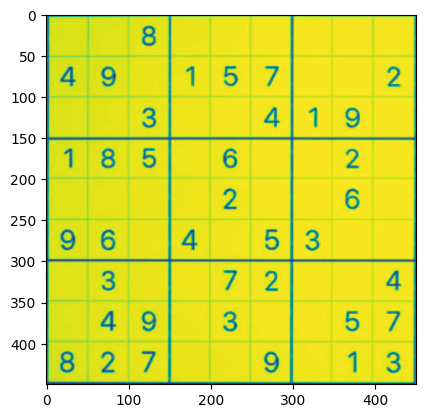

In [235]:
#For compairing 
plt.figure()
plt.imshow(imagewrap)
plt.show()

In [257]:
def solve_sudoku(board):
    def solve(board):
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == 0:
                    for num in range(1, 10):
                        if is_valid(num, board, i, j):
                            board[i][j] = num
                            if solve(board):
                                return True
                            else:
                                board[i][j] = 0
                    return False
        return True

    def is_valid(num, board, row, col):
        for i in range(9):
            if board[i][col] == num:
                return False
            if board[row][i] == num:
                return False
            if board[3 * (row // 3) + (i // 3)][3 * (col // 3) + (i % 3)] == num:
                return False
        return True
    
    solve(board)
    return board

In [258]:
solved_grid = solve_sudoku(grid)

In [259]:
def sudoku_to_image(grid, image_path="sudoku.png"):
    # Define image size and create a blank white image
    img_size = 450  # 450x450 pixels
    cell_size = img_size // 9
    img = Image.new('RGB', (img_size, img_size), color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    # Load a font
    font = ImageFont.truetype("arial.ttf", size=24)

    # Draw the grid
    for i in range(10):
        # Thicker lines for 3x3 grid boundaries
        line_width = 3 if i % 3 == 0 else 1
        # Draw horizontal and vertical lines
        draw.line([(0, i * cell_size), (img_size, i * cell_size)], fill=0, width=line_width)
        draw.line([(i * cell_size, 0), (i * cell_size, img_size)], fill=0, width=line_width)

    # Draw the numbers in the grid
    for i in range(9):
        for j in range(9):
            num = grid[i][j]
            if num != 0:
                # Calculate the position to draw the number
                text_x = j * cell_size + cell_size // 3
                text_y = i * cell_size + cell_size // 5
                draw.text((text_x, text_y), str(num), font=font, fill=(0, 0, 0))

    # Save the image
    img.save(image_path)

In [260]:
sudoku_to_image(solved_grid, "solved_sudoku.png")

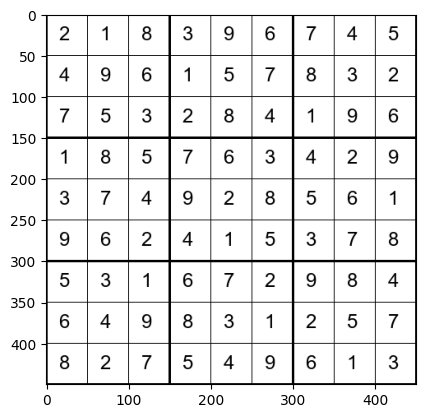

In [261]:
solved_img = cv2.imread("solved_sudoku.png")

plt.figure()
plt.imshow(solved_img)
plt.show()